<a href="https://colab.research.google.com/github/statarko/images/blob/main/Sarah_Tatarko_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage import data, io, filters
import skimage.io
import skimage.color
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
import scipy

In [ ]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 5.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Part 1b

In [ ]:
image = skimage.io.imread('https://raw.githubusercontent.com/statarko/images/ac4efe50e1603d579892170585c6e9f36756eae6/image08.jpg')

In [ ]:
stdimage = skimage.io.imread('https://raw.githubusercontent.com/statarko/images/main/standard%20image.jpg')

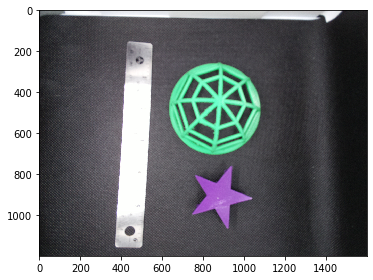

In [ ]:
io.imshow(image)

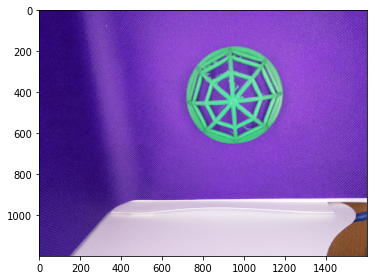

In [ ]:
io.imshow(stdimage)

## Crop images

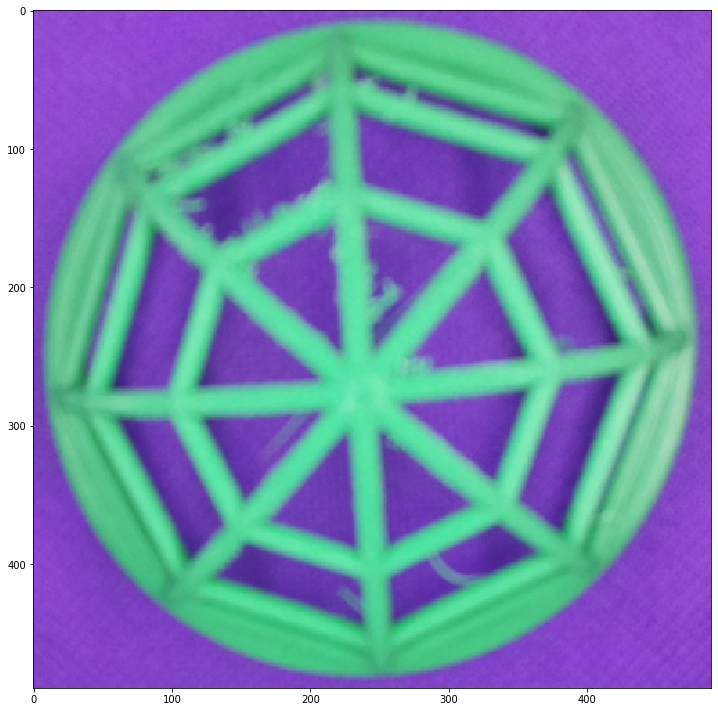

In [ ]:
stdimage1=stdimage[170:660, 710:1200]
plt.figure(figsize=(10, 10))
io.imshow(stdimage1)
io.show()

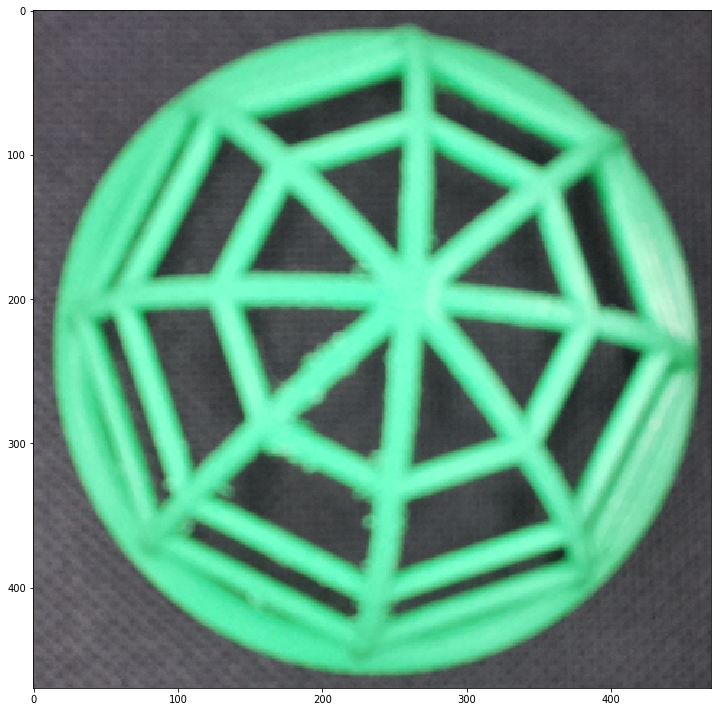

In [ ]:
image1=image[245:715, 620:1090]
plt.figure(figsize=(10, 10))
io.imshow(image1)
io.show()

## Gray image and black/white image

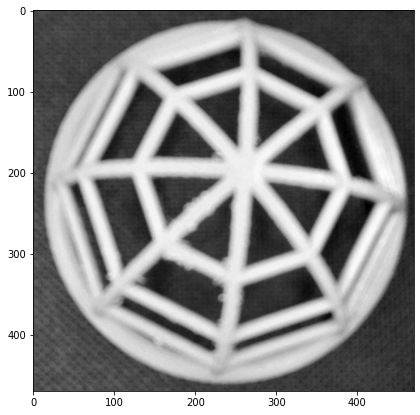

In [ ]:
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 
 
# Converting RGB image to Monochrome
gray_image1 = rgb2gray(image1)
plt.subplot(1, 2, 2)
 
# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_image1, cmap="gray")

In [ ]:
gray_image1.shape


(465, 470)

In [ ]:
for value in gray_image1:
  print(value)

In [ ]:
nr=int(len(gray_image1.mean(axis=1)))
nc=int(len(gray_image1.mean(axis=0)))
print("number of rows=", nr)
print("number of columns=", nc)

number of rows= 465
number of columns= 470


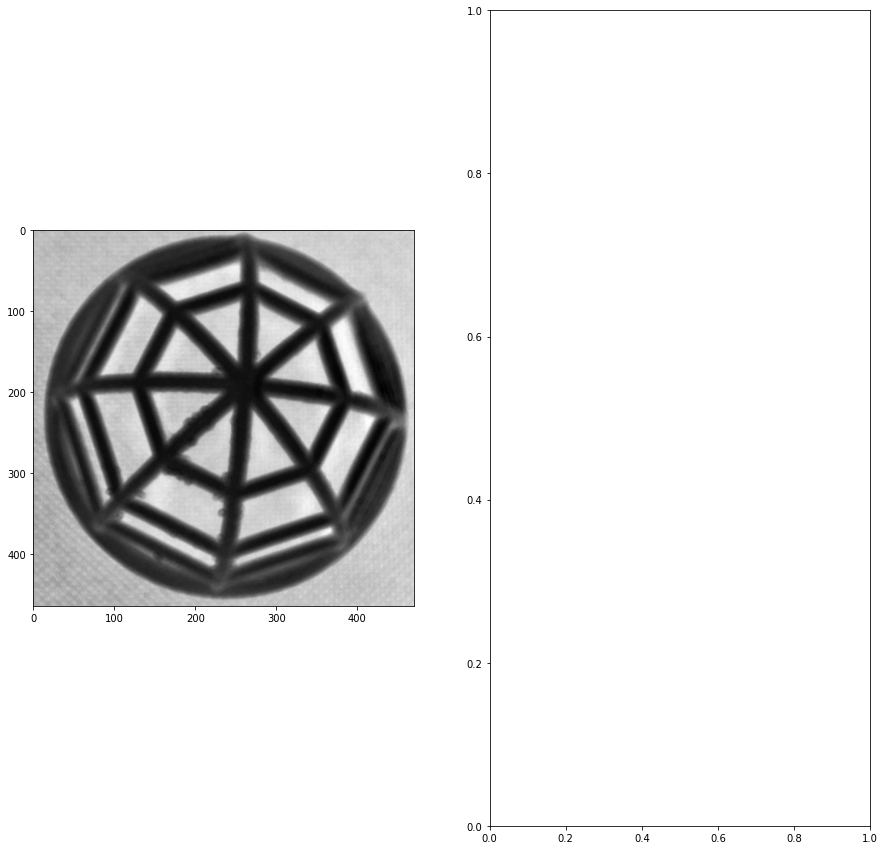

In [ ]:
negative_image1=np.zeros_like(gray_image1)
for i in range(0, nr):
    for j in range(0, nc):
        negative_image1[i][j]=1-gray_image1[i][j]
    
# plt.imshow(negative_coffee, cmap="gray")

# Displaying the sample image
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
plt.imshow(gray_image1,cmap="gray")
plt.subplot(1, 2, 1)
plt.imshow(negative_image1, cmap="gray")
plt.subplot(1, 2, 2)

## Image Difference Operation

In [ ]:


 
 
# Converting std image
gray_stdimage1 = rgb2gray(stdimage1)
plt.subplot(1, 2, 2)
 


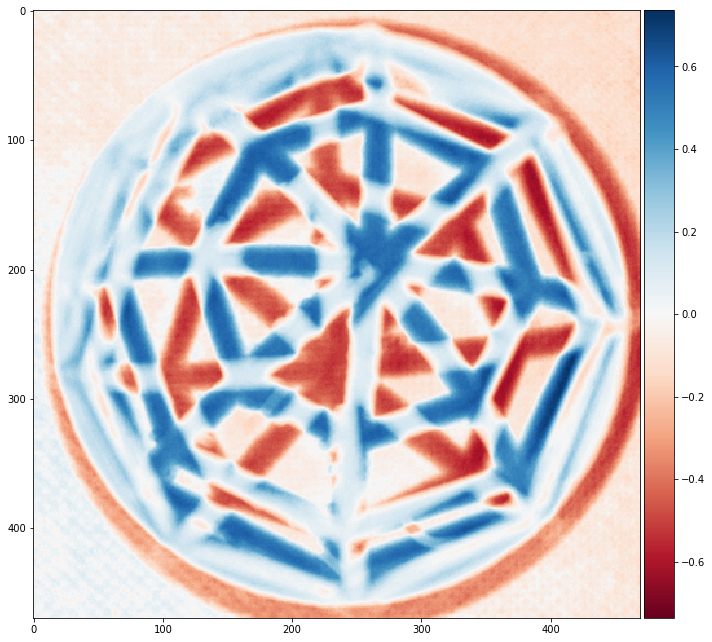

In [ ]:
diff_image=np.zeros_like(gray_image1)
nr=len(gray_image1.mean(axis=1))
nc=len(gray_image1.mean(axis=0))
# since the gray scale has been standardized in [0, 1], 0 - black; 1 - white
for i in range(0, nr):
    for j in range(0, nc):
        diff_image[i][j]= gray_image1[i][j] - gray_stdimage1[i][j]
plt.figure(figsize=(10, 10))
io.imshow(diff_image)
io.show()

## Count the number of 0's (blacks) pixels

In [ ]:
diff_image.size

220900

In [ ]:
na=len(diff_image.mean(axis=1))
nb=len(diff_image.mean(axis=0))

count = 0 
for i in range(0, na):
    for j in range(0, nb):
        if diff_image[i][j] == 0:
          count = count + 1
        

In [ ]:
print(count)

5


## Histogram

In [ ]:
diff_image

array([[-0.05003412, -0.04219098, -0.05478902, ..., -0.10797098,
        -0.12562941, -0.11219804],
       [-0.04192314, -0.05760941, -0.05395569, ..., -0.13066706,
        -0.13739412, -0.11977333],
       [-0.05368784, -0.06069765, -0.0727302 , ..., -0.11105922,
        -0.13656078, -0.13097255],
       ...,
       [ 0.00371412,  0.00176471,  0.02921569, ..., -0.10605922,
        -0.12231098, -0.12231098],
       [-0.00412902,  0.01547882,  0.02332196, ..., -0.08896627,
        -0.12566706, -0.12456588],
       [ 0.00763569,  0.04459647,  0.03508667, ..., -0.07662824,
        -0.0685251 , -0.0853502 ]])

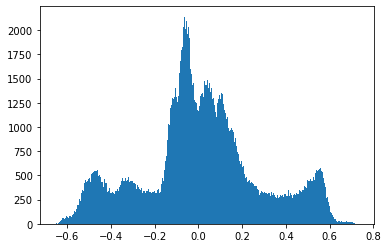

In [ ]:
ax = plt.hist(diff_image.ravel(), bins = 400)
plt.show()

## Descriptive Statistics

In [ ]:
scipy.stats.describe(diff_image.ravel())

DescribeResult(nobs=220900, minmax=(-0.6561525490196077, 0.7355592156862745), mean=0.009687817745586249, variance=0.073573660857861, skewness=0.09544720000270579, kurtosis=-0.17590952298532514)

In [ ]:
data = diff_image.ravel()
Q1=np.percentile(data,25, interpolation='lower')
Q2=np.percentile(data,50, interpolation='lower')
Q3=np.percentile(data,75, interpolation='lower')
IQR=Q3-Q1
print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)
print('IQR=', IQR)

Q1= -0.12301450980392159
Q2= -0.0010713725490196224
Q3= 0.15110470588235292
IQR= 0.2741192156862745


# Part II

In [ ]:
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
import pylab
from scipy.stats import beta
from scipy.stats import f
from scipy.stats import multivariate_normal
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/statarko/images/main/A9%20Data1.csv', sep=',', na_values=".")
data1001= np.array(data[['100']].iloc[0:9])
data1002= np.array(data[['100']].iloc[9:11])
data1003 = np.array(data[['100']])
data1731= np.array(data[['173']].iloc[0:9])
data1732= np.array(data[['173']].iloc[9:11])
data1733 = np.array(data[['173']])
data2001= np.array(data[['200']].iloc[0:9])
data2002= np.array(data[['200']].iloc[9:11])
data2003 = np.array(data[['200']])

In [ ]:
data1001 = data1001.flatten()
data2001 = data2001.flatten()
data1731 = data1731.flatten()

In [ ]:
mean1001 = data1001.mean()

In [ ]:
mean1731= data1731.mean()

In [ ]:
mean2001 = data2001.mean()

In [ ]:
stdev1001= statistics.stdev(data1001)

In [ ]:
stdev1731 = statistics.stdev(data1731)

In [ ]:
stdev2001 = statistics.stdev(data2001)

## ACF Plots

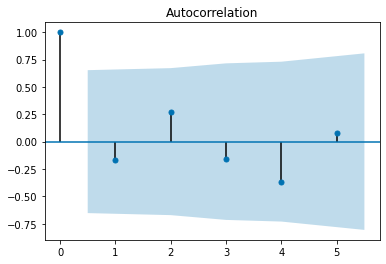

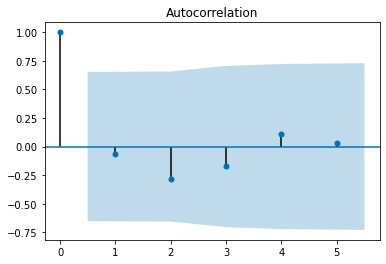

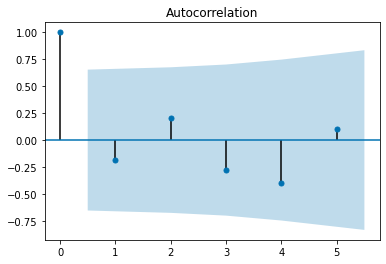

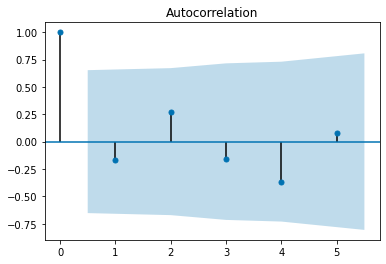

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1001, lags=5)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1731, lags=5)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2001, lags=5)

## Phase I

In [ ]:
class MR_ControlChart:
    
    def fit(self,data, point):
        # data is the Phase I data
        # point is the Phase II or all dataset
        self.X = data
        self.number_of_sample = len(self.X)
        self.mR = np.zeros(((self.number_of_sample-1),1))
        self.Y = point
        self.number_of_sample2 = len(self.Y)
        self.mR2 = np.zeros(((self.number_of_sample2-1),1))

        for i in range(len(self.mR)):
            self.mR[i] = abs(self.X[i+1] - self.X[i])

        for i in range(len(self.mR2)):
            self.mR2[i] = abs(self.Y[i+1] - self.Y[i])
    
    def ControlChart(self,d2,D4,D3):
        
        ucl_X   = self.X.mean() + (3/d2)*self.mR.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - (3/d2)*self.mR.mean()

        ucl_mR   = D4*self.mR.mean()
        cl_mR    = self.mR.mean() 
        lcl_mR   = D3*self.mR.mean()
        

        plt.figure(figsize=(15,5))
        plt.plot(self.Y,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.Y),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.Y),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.Y),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.Y)),rotation='vertical')
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.mR2 ,marker="o",color="k",label="mR ")
        plt.plot([ucl_mR ]*len(self.Y),color="r",label="UCL={}".format(ucl_mR.round(2)))
        plt.plot([cl_mR ]*len(self.Y),color="b",label="CL={}".format(cl_mR.round(2)))
        plt.plot([lcl_mR ]*len(self.Y),color="r",label="LCL={}".format(lcl_mR.round(2)))
        plt.title("mR  Chart")
        plt.xticks(np.arange(len(self.Y)),rotation='vertical')
        plt.legend()
        plt.show()

        for i in range(len(self.Y)):
            if (self.Y[i] > ucl_X or self.Y[i] < lcl_X) : 
              print ("ALERT!! IX CHART IS OUT OF CONTROL")
        for i in range(len(self.mR2)):
            if (self.mR2[i] > ucl_mR or self.mR2[i] < lcl_mR) : 
              print ("ALERT!! MR CHART IS OUT OF CONTROL")

Layer 100

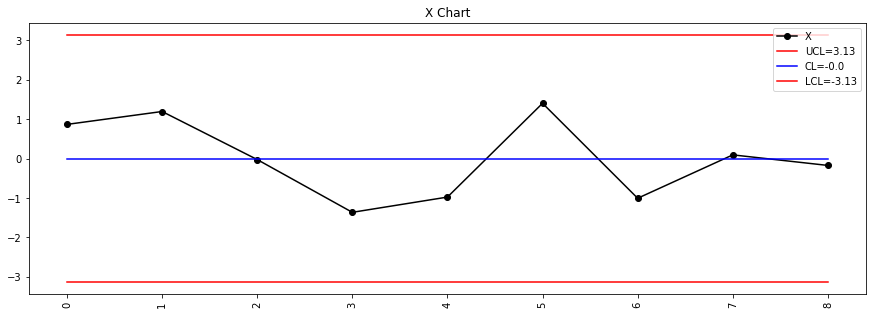

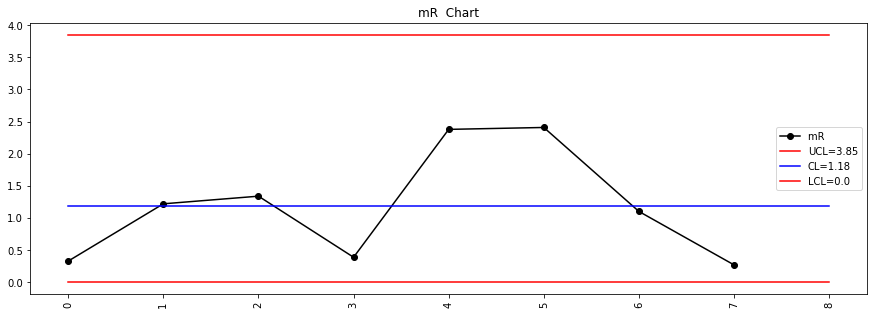

In [ ]:
chart = MR_ControlChart()
chart.fit(data=data1001, point=data1001)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

Layer 173

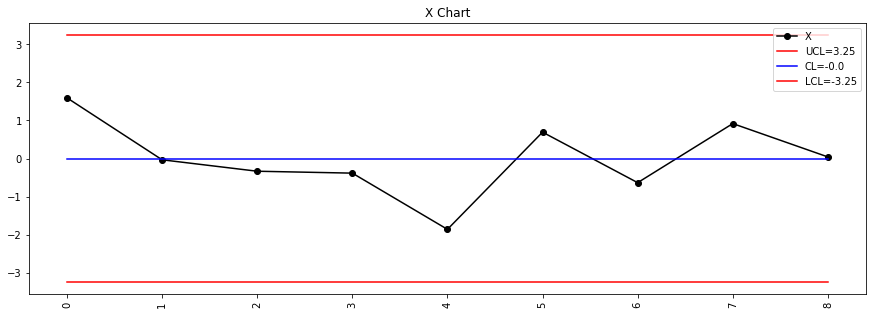

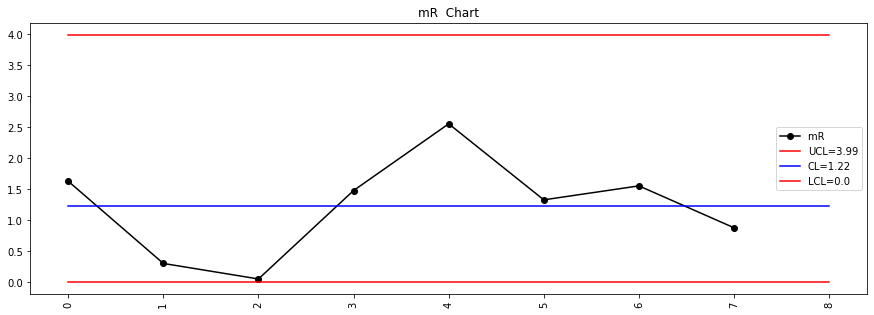

In [ ]:
chart = MR_ControlChart()
chart.fit(data=data1731, point=data1731)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

Layer 200

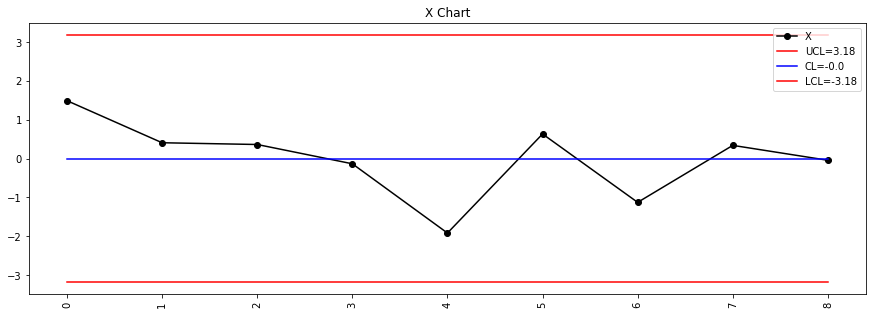

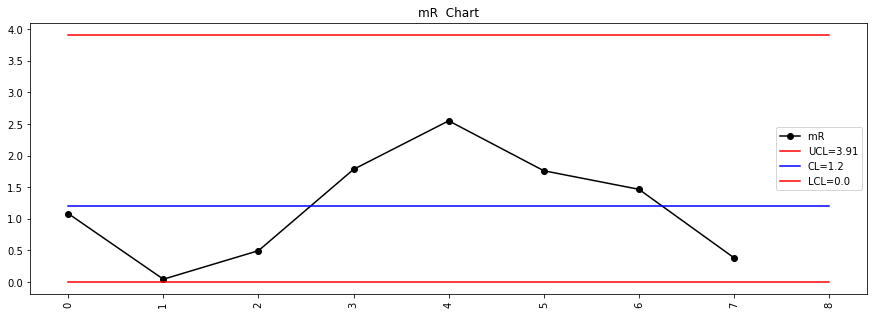

In [ ]:
chart = MR_ControlChart()
chart.fit(data=data2001, point=data2001)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

## Phase II

Layer 100

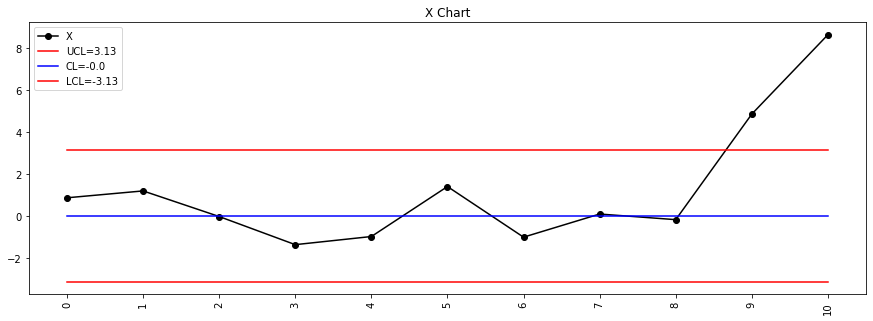

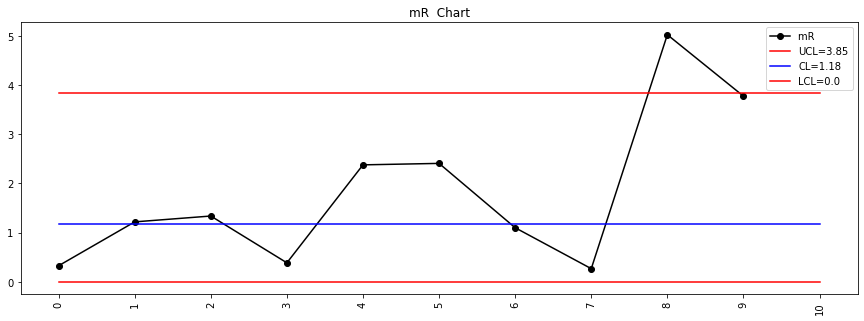

ALERT!! IX CHART IS OUT OF CONTROL
ALERT!! IX CHART IS OUT OF CONTROL
ALERT!! MR CHART IS OUT OF CONTROL


In [ ]:
chart = MR_ControlChart()
chart.fit(data=data1001, point=data1003)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

Layer 173

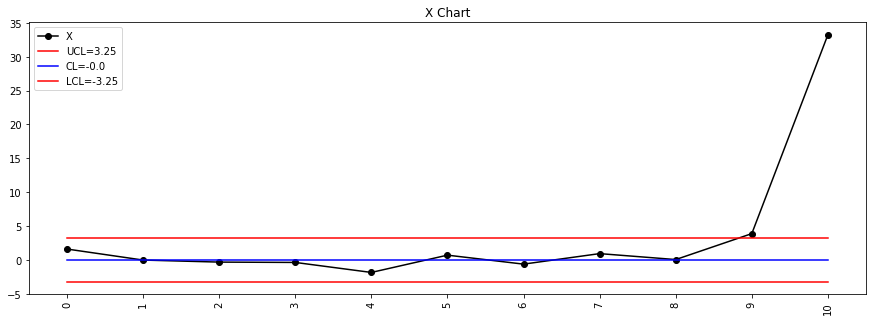

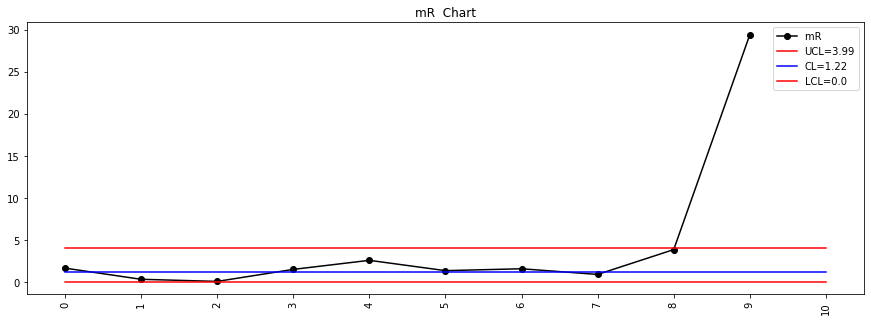

ALERT!! IX CHART IS OUT OF CONTROL
ALERT!! IX CHART IS OUT OF CONTROL
ALERT!! MR CHART IS OUT OF CONTROL


In [ ]:
chart = MR_ControlChart()
chart.fit(data=data1731, point=data1733)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

Layer 200

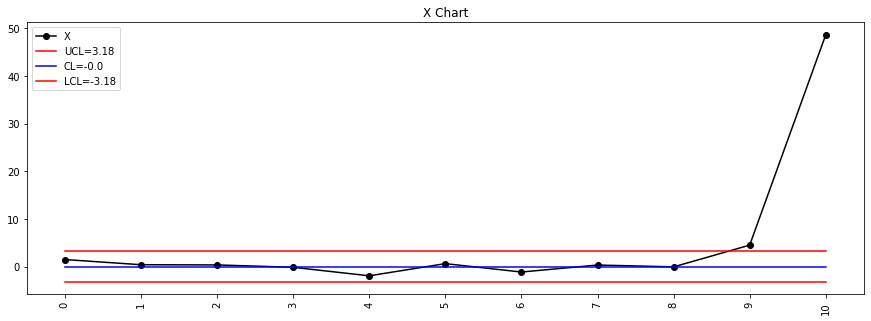

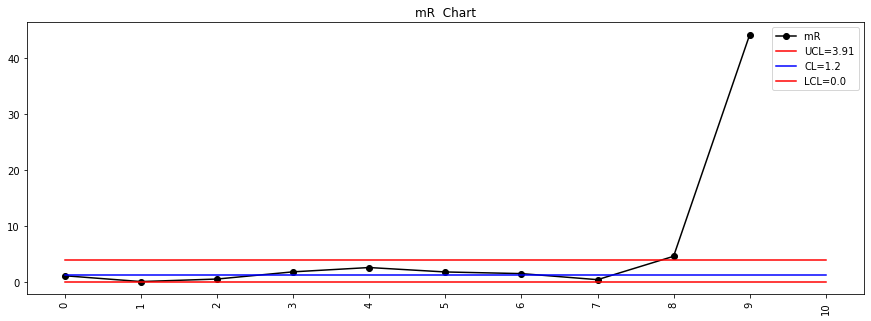

ALERT!! IX CHART IS OUT OF CONTROL
ALERT!! IX CHART IS OUT OF CONTROL
ALERT!! MR CHART IS OUT OF CONTROL
ALERT!! MR CHART IS OUT OF CONTROL


In [ ]:
chart = MR_ControlChart()
chart.fit(data=data2001, point=data2003)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)